In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import indicoio
import glob
from IPython.core.display import HTML
import json
import requests
import numpy as np
import pandas as pd

In [7]:
f = open('indico.key', 'r')
key = f.read()
f.close()
key = key.replace('\n', '')
indicoio.config.api_key = key

In [68]:
url = 'https://dataskeptic.com/api/blog?limit=10'
r = requests.get(url)

In [69]:
blogs = json.loads(r.content)

In [70]:
descs = map(lambda x: x['desc'], blogs)

In [71]:
keywords = indicoio.keywords(descs, version=2)

In [79]:
def plot_data(kwds, blog):
    df = pd.DataFrame({'keyword': kwds.keys(), 'weight': kwds.values()})
    df.sort_values('weight', ascending=0, inplace=True)
    df = df[0:10]
    df = df.iloc[::-1]
    df.index = np.arange(df.shape[0])
    plt.barh(df.index, df['weight'])
    plt.yticks(df.index + 0.4, df['keyword'])
    plt.xlabel('weight')
    plt.title(blog['title'])
    plt.show()

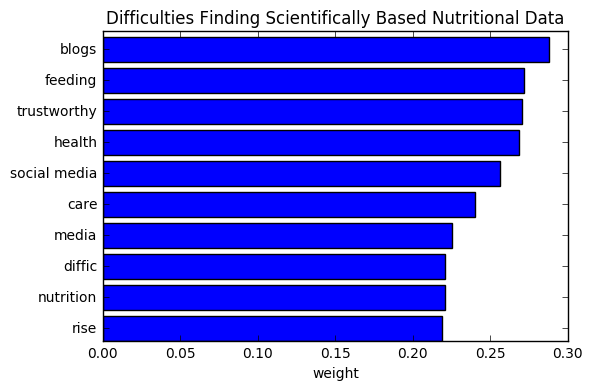

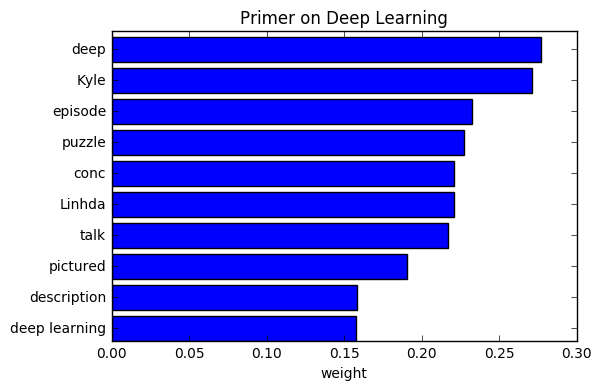

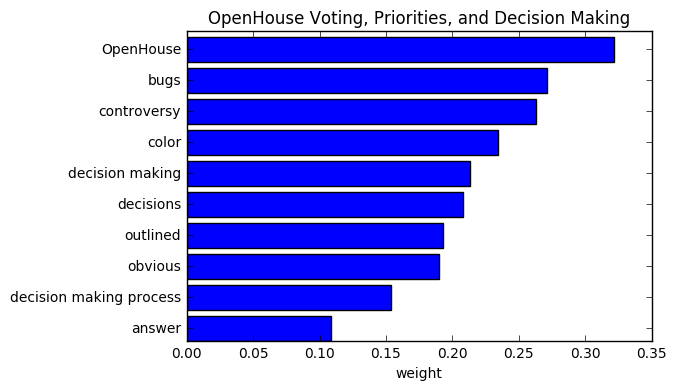

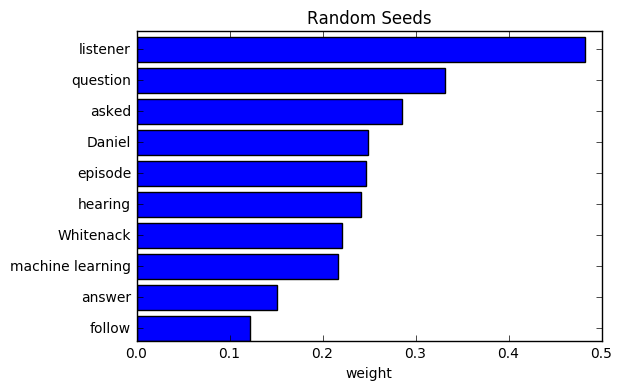

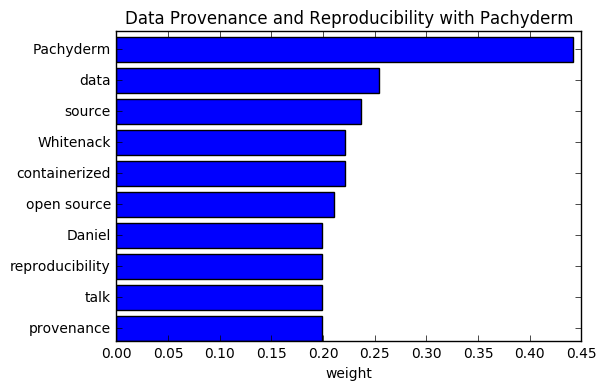

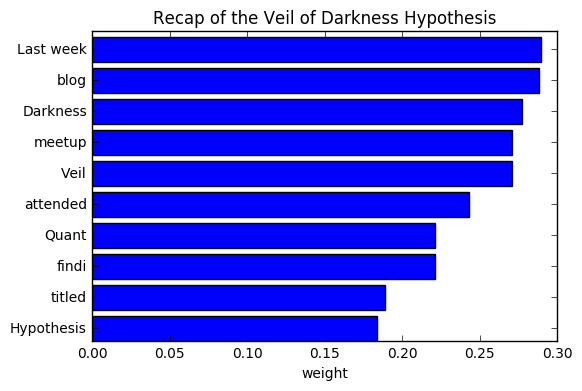

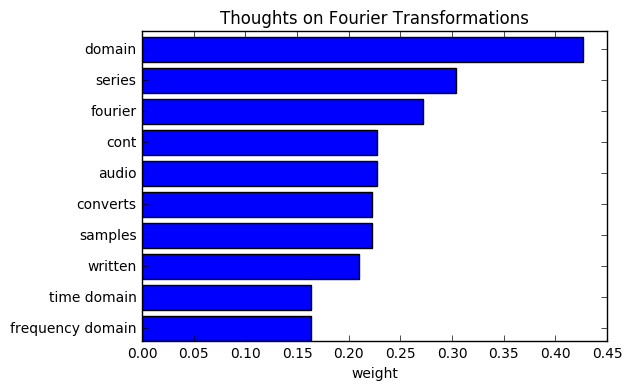

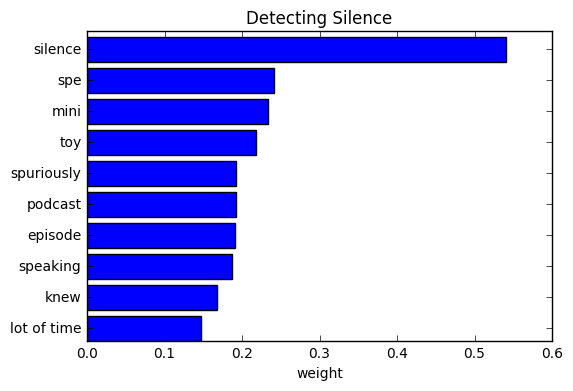

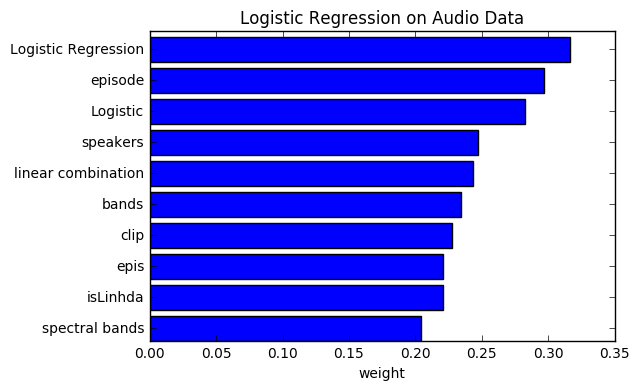

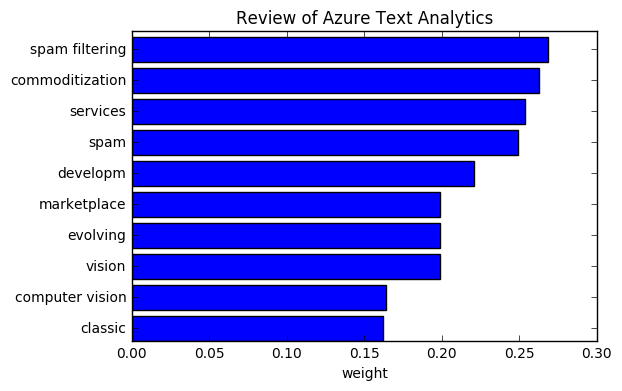

IndexError: list index out of range

In [80]:
for i in range(len(blog)):
    blog = blogs[i]
    kwds = keywords[i]
    plot_data(kwds, blog)